In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [3]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [4]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Sun Jun 27 22:36:04 +0000 2021',
 'id': 1409279392174415878,
 'id_str': '1409279392174415878',
 'full_text': 'Fiido D11 review: This folding ebike has good looks, low weight, and solid range https://t.co/uDlPHnKYtw https://t.co/PoQ7nIrwat',
 'truncated': False,
 'display_text_range': [0, 104],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/uDlPHnKYtw',
    'expanded_url': 'http://dlvr.it/S2ZnJ1',
    'display_url': 'dlvr.it/S2ZnJ1',
    'indices': [81, 104]}],
  'media': [{'id': 1409279390123380737,
    'id_str': '1409279390123380737',
    'indices': [105, 128],
    'media_url': 'http://pbs.twimg.com/media/E47EI32VUAEd0kb.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/E47EI32VUAEd0kb.jpg',
    'url': 'https://t.co/PoQ7nIrwat',
    'display_url': 'pic.twitter.com/PoQ7nIrwat',
    'expanded_url': 'https://twitter.com/CliffordEnzly/status/1409279392174415878/photo/1',
    'type': 'photo',
    'sizes': {'thu

In [5]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,Fiido D11 review: This folding ebike has good ...
1,Fiido D11 review: A folding ebike with good lo...
2,@skepticalpark I’ve been using the eBike setti...
3,"@MPSGreenwich Jesus, this county is backwards...."
4,Fiido D11 review: This folding ebike has good ...
...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...
1996,Exploring Miami and Key Biscayne https://t.co/...
1997,@CliffordAgius Buy an eBike and get some fresh...
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...


In [6]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,Fiido D11 review: This folding ebike has good ...,0,0,CliffordEnzly
1,Fiido D11 review: A folding ebike with good lo...,0,0,Alan_Nishihara
2,@skepticalpark I’ve been using the eBike setti...,0,0,DadWearsGlasses
3,"@MPSGreenwich Jesus, this county is backwards....",0,0,pjtobin00
4,Fiido D11 review: This folding ebike has good ...,0,0,TechnoToned
...,...,...,...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...,0,1,kumar3178
1996,Exploring Miami and Key Biscayne https://t.co/...,0,0,Exped_Electric
1997,@CliffordAgius Buy an eBike and get some fresh...,0,1,normanmackay3
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...,0,0,bikes_cycling


In [7]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [8]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,Fiido D11 review: This folding ebike has good ...,0,0,CliffordEnzly,fiido d11 review folding ebike good looks low ...
1,Fiido D11 review: A folding ebike with good lo...,0,0,Alan_Nishihara,fiido d11 review folding ebike good looks low ...
2,@skepticalpark I’ve been using the eBike setti...,0,0,DadWearsGlasses,skepticalpark ive using ebike setting free ver...
3,"@MPSGreenwich Jesus, this county is backwards....",0,0,pjtobin00,mpsgreenwich jesus county backwards ride ebike...
4,Fiido D11 review: This folding ebike has good ...,0,0,TechnoToned,fiido d11 review folding ebike good looks low ...
...,...,...,...,...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...,0,1,kumar3178,bjp4haryana mlkhattar anilvijminister opdhanka...
1996,Exploring Miami and Key Biscayne https://t.co/...,0,0,Exped_Electric,exploring miami key biscayne via youtube ebike...
1997,@CliffordAgius Buy an eBike and get some fresh...,0,1,normanmackay3,cliffordagius buy ebike get fresh air
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...,0,0,bikes_cycling,48v 20ah 1000w 750w ebike lithium ion battery ...


In [9]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,Fiido D11 review: This folding ebike has good ...,0,0,CliffordEnzly,fiido d11 review folding ebike good looks low ...,0.233333,0.333333
1,Fiido D11 review: A folding ebike with good lo...,0,0,Alan_Nishihara,fiido d11 review folding ebike good looks low ...,0.350000,0.450000
2,@skepticalpark I’ve been using the eBike setti...,0,0,DadWearsGlasses,skepticalpark ive using ebike setting free ver...,0.400000,0.800000
3,"@MPSGreenwich Jesus, this county is backwards....",0,0,pjtobin00,mpsgreenwich jesus county backwards ride ebike...,0.026190,0.297619
4,Fiido D11 review: This folding ebike has good ...,0,0,TechnoToned,fiido d11 review folding ebike good looks low ...,0.233333,0.333333
...,...,...,...,...,...,...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...,0,1,kumar3178,bjp4haryana mlkhattar anilvijminister opdhanka...,0.000000,0.000000
1996,Exploring Miami and Key Biscayne https://t.co/...,0,0,Exped_Electric,exploring miami key biscayne via youtube ebike...,0.000000,1.000000
1997,@CliffordAgius Buy an eBike and get some fresh...,0,1,normanmackay3,cliffordagius buy ebike get fresh air,0.300000,0.500000
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...,0,0,bikes_cycling,48v 20ah 1000w 750w ebike lithium ion battery ...,0.000000,0.000000


In [10]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['bosch', 'yamaha', 'shimano', 'trek', 'rad', 'aventon', 'specialized']

In [11]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,bosch
1,yamaha
2,shimano
3,trek
4,rad
5,aventon
6,specialized


In [12]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("bosch")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
594,@BoscheBikeUS your eBike connect is faulty &am...,0,0,WayneFougere,boschebikeus ebike connect faulty hasnt synced...,0.050000,0.525000
723,@BoscheBikeUS how do I get help for ebike conn...,0,0,WayneFougere,boschebikeus get help ebike connect recorded t...,-0.500000,0.200000
877,https://t.co/1FgRoTvWQ5 #domainname acquired b...,0,0,domain_yurdu,domainname acquired bosch,0.000000,0.000000
932,"According to whois record, as updated on June ...",3,17,AllThingsDomain,according whois record updated june 24 2021 ro...,0.136364,0.454545
984,We know a thing or two about commuting in chal...,1,2,Diamondbackbike,know thing two commuting challenging weather f...,0.377778,0.566667
1045,"Buyers appear to be Bosch Global, who make som...",2,20,DotWeekly,buyers appear bosch global make pretty killer ...,0.062500,0.375000
1093,@OctoberFerguson Thanks now I understand very ...,1,4,SARA2001NOOR,octoberferguson thanks understand honored love...,0.144444,0.544444
1098,"""You don’t need a car to enjoy Melbourne’s foo...",2,9,ternbicycles,dont need car enjoy melbournes food culture sc...,0.400000,0.500000
1232,""" Every family deserves a quality ebike"" \nThe...",1,4,Power2_pedal,every family deserves quality ebike bikes comp...,0.375000,1.000000
1491,Chris Nolte of Propel Bikes talks eBike testin...,1,10,BoscheBikeUS,chris nolte propel bikes talks ebike testing s...,0.000000,0.000000


In [13]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [14]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,bosch,0.161579
1,yamaha,0.130952
2,shimano,0.136574
3,trek,0.202111
4,rad,0.207558
5,aventon,0.293030
6,specialized,0.177083


In [15]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1818,"Best ebike converters for 26"" jorvik trikes......",1,0,rowenadiamond,best ebike converters 26 jorvik trikes tricycl...,1.0,0.3
713,"Spin the World, with best bikes &amp; Accessor...",0,0,spinstore24,spin world best bikes accessories ultralight m...,1.0,0.3
1291,@AmitabhJha3 Petrol 100 -- electric bike deman...,0,0,Tanmay79298370,amitabhjha3 petrol 100 electric bike demand rv...,1.0,0.3
1351,This is excellent advice!!\nScroll your option...,0,3,FanladenRCTID,excellent advice scroll options google maps tr...,1.0,1.0
1363,Excellent #ebike battery tips from the folks a...,0,0,kjaggi,excellent ebike battery tips folks sdflyrides,1.0,1.0
1930,"Spin the World, with best bikes &amp; Accessor...",0,0,spinstore24,spin world best bikes accessories carbon fibre...,1.0,0.3
299,An excellent way to see and discover this land...,4,34,RawdonAdams,excellent way see discover land 105kms 6 hours...,1.0,1.0
305,#PrideMonth 2021 isn't over yet!! Show the @Mu...,1,0,Boulder_Bcycle,pridemonth 2021 yet show museumofboulder rode ...,1.0,1.0
1856,@TMobile For me I would like an electric bike ...,0,0,westcamo,tmobile would like electric bike also gifts wo...,1.0,1.0
1428,Keeping our wheels on the ground &amp; our hea...,0,6,MassTransitLady,keeping wheels ground heads clouds riding best...,1.0,0.3


In [16]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1672,Students from Hyderabad's KL University Develo...,431,1477,weatherindia,students hyderabad kl university develop elect...,0.000000,0.000000
486,Are you or is somebody you know interested in ...,123,115,adamtranter,somebody know interested buying electric bike ...,0.187500,0.437500
1125,Tuesday night I rode a dumb yuppie electric bi...,73,887,maggiekb1,tuesday night rode dumb yuppie electric bike o...,0.195000,0.596667
1056,Happy to announce I've brokered the sale of ht...,48,269,katebuckley1,happy announce brokered sale congratulations b...,0.700000,0.850000
1599,"""Every minute counts in an emergency,"" knows #...",37,1020,BoschGlobal,every minute counts emergency knows paramedic ...,0.050000,0.200000
856,It's 🤏 close to the #weekend &amp; that means ...,26,30,PHypeuk,close weekend means giveaway time week giving ...,0.554167,0.591667
1022,Another Blockbuster for Kate Buckley! Buckley ...,19,77,DNJournal,another blockbuster kate buckley buckley media...,0.000000,0.000000
603,So happy we finally get to make this announcem...,18,129,WarrenMobility,happy finally get make announcement electric b...,0.466667,0.966667
472,#innovation #sustainability \n\nBrothers Retur...,17,53,thebetterindia,innovation sustainability brothers return sili...,0.000000,0.000000
979,"Great sale, @katebuckley1! This domain name wa...",13,34,DInvesting,great sale katebuckley1 domain name acquired l...,0.316667,0.408333


In [17]:
# users producing most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)['user']

1672      weatherindia
486        adamtranter
1125         maggiekb1
1056      katebuckley1
1599       BoschGlobal
856            PHypeuk
1022         DNJournal
603     WarrenMobility
472     thebetterindia
979         DInvesting
Name: user, dtype: object

In [18]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains("trek")]['text_clean'])

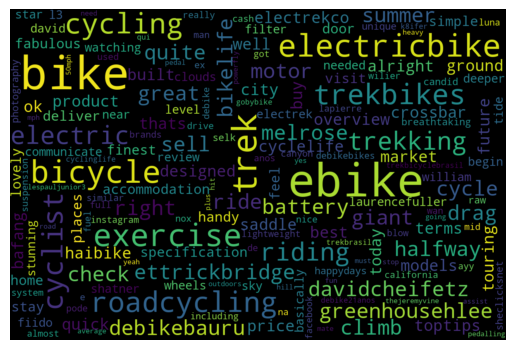

In [19]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'shimano'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()